# **0. 安装与调用**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/education/2020")

import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

Mounted at /content/gdrive


# **1. 读取数据**

In [24]:
time_0 = time.time()
df = pd.read_csv('./2020_data/data_u_code.csv', low_memory=False)
print('time of opening csv file: %.4f s' % (time.time() - time_0))

ability = df.iloc[:, [0] + list(range(87, 109))]
phenomenon = df.iloc[:, range(109, df.shape[1])]
print(ability.keys())
print(phenomenon.keys())

time of opening csv file: 4.6029 s
Index(['INDEX', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20',
       'C21', 'C22'],
      dtype='object')
Index(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11',
       'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D19', 'D20', 'D21',
       'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31',
       'D32', 'D33', 'D34', 'D35', 'D36', 'D37', 'D38', 'D39', 'D40', 'D41',
       'D42', 'D43', 'D44', 'D45', 'D46', 'D47', 'D48', 'D49', 'D50', 'D51',
       'D52', 'D53', 'D54', 'D55', 'D56', 'D57', 'D58', 'D59', 'D60', 'D61',
       'D62', 'D63', 'D64', 'D65', 'D66', 'D67', 'D68'],
      dtype='object')


In [3]:
def ab_ph(i):
    if i < 1 or i >= 23:
        return []
    ap = np.array([1, 3, 5, 7, 9, 14, 19, 21, 23, 26, 28, 30, 33, 35, 37, 40, 44, 48, 52, 58, 64, 66, 69])
    s, s_ = ap[i-1], ap[i]
    l = []
    for j in range(s, s_):
        l.append('D'+str(j))
    return l

In [27]:
score = pd.DataFrame(columns=['Num', 'Avg', 'Std'], index=['C'+str(i) for i in range(1, 23)])

for ab in ability.keys()[1:]:
    n = int(ab[1:])
    s = ab_ph(n)
    p = df[df[ab] == 1][s].dropna(axis=0)
    num = p.shape[0]
    avg = p.mean(axis=0).mean()
    std = np.sqrt(((p - avg) ** 2).mean().mean())
    score.iloc[n-1, 0] = num
    score.iloc[n-1, 1] = avg
    score.iloc[n-1, 2] = std

score['Num'] = (score['Num'] - score['Num'].mean()) / score['Num'].std() 
score['Num'] *= 3 / score['Num'].abs().max()
score['Avg'] = (score['Avg'] - score['Avg'].mean()) / score['Avg'].std()
score['Avg'] *= 3 / score['Avg'].abs().max()
print(score.sort_values(by='Avg'))

          Num        Avg       Std
C14  -1.28978   -2.89238   1.23795
C16 -0.814487   -2.65017   1.19858
C13 -0.563964   -2.61959   1.05525
C20  -1.31484    -2.2678   1.10886
C17  -1.17851   -2.16452   1.13211
C22  -1.12124   -1.07356   1.11061
C19  -1.24608  -0.997849    1.1477
C6    1.40076  -0.135079  0.988966
C7   0.384125 -0.0277942   1.12084
C2    1.31503   0.121726   1.09504
C11 -0.921863   0.183035  0.963577
C18  -1.11838   0.446557  0.985147
C21  -1.27134   0.561832  0.887581
C12 -0.637033   0.713339  0.933347
C8    2.10543   0.784145   0.82523
C5          3    1.03957  0.908195
C15 -0.156447    1.20959  0.838927
C10  -1.01539    1.38739  0.943863
C4  -0.133691    1.47633   1.02234
C3    0.88872     1.9293   0.89419
C1    2.66319    1.97593  0.931852
C9    1.02581          3  0.760064


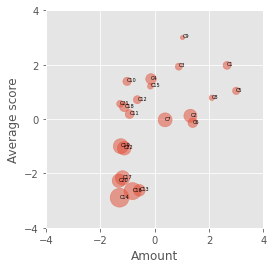

In [107]:
x = np.array(score['Num'])
y = np.array(score['Avg'])
s = list((np.array(score['Std'])) ** 6 * 100)
plt.scatter(x, y, s=s, alpha=0.5)
plt.xlim((-4, 4))
plt.ylim((-4, 4))
plt.xticks(range(-4, 5, 2))
plt.yticks(range(-4, 5, 2))
ax = plt.gca()
ax.set_aspect(1)
plt.xlabel('Amount')
plt.ylabel('Average score')
for i in range(len(x)):
    ax.text(x[i], y[i], 'C' + str(i+1), fontdict={'fontsize': 5})
plt.savefig('ability.pdf', bbox_inches='tight')
plt.show()

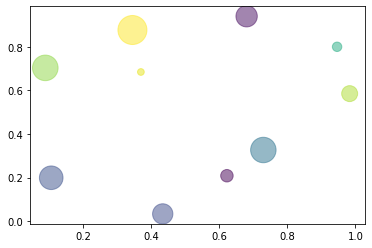

In [45]:
# 10个点
N = 10
x = np.random.rand(N)
y = np.random.rand(N)
# 每个点随机大小
s = (30*np.random.rand(N))**2
# 随机颜色
c = np.random.rand(N)
plt.scatter(x, y, s=s, c=c, alpha=0.5)
plt.show()